In [1]:
print("BERT NLP project started successfully!")


BERT NLP project started successfully!


In [2]:
from transformers import BertTokenizer, BertModel
import torch


C:\Users\Riya Diwakar\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Riya Diwakar\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

print("BERT model loaded successfully!")


C:\Users\Riya Diwakar\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Riya Diwakar\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back 

BERT model loaded successfully!


In [4]:
text = "I love learning artificial intelligence"
inputs = tokenizer(text, return_tensors="pt")

outputs = model(**inputs)

print("Input text:", text)
print("Last hidden state shape:", outputs.last_hidden_state.shape)


Input text: I love learning artificial intelligence
Last hidden state shape: torch.Size([1, 7, 768])


In [5]:
sentences = [
    "I got the loan approved",
    "The loan application was rejected",
    "AI is changing the world"
]

for s in sentences:
    inputs = tokenizer(s, return_tensors="pt")
    outputs = model(**inputs)
    print(f"Sentence: {s}")
    print("Embedding shape:", outputs.last_hidden_state.shape)
    print("-" * 50)


Sentence: I got the loan approved
Embedding shape: torch.Size([1, 7, 768])
--------------------------------------------------
Sentence: The loan application was rejected
Embedding shape: torch.Size([1, 7, 768])
--------------------------------------------------
Sentence: AI is changing the world
Embedding shape: torch.Size([1, 7, 768])
--------------------------------------------------


## Research Questions

1. How effectively does BERT capture contextual meaning in different sentences?
2. Does sentence length affect BERT's internal representations?
3. How consistent are embeddings across semantically similar sentences?
4. What limitations does BERT show in understanding domain-specific inputs?


## Conclusion & Insights

- BERT successfully converts text into meaningful numerical representations.
- It captures contextual differences between similar sentences.
- The model performs well without task-specific training.
- However, BERT does not generate text and is limited to understanding tasks.
- Domain-specific fine-tuning could improve performance in specialized applications.

### Applications:
- Sentiment Analysis
- Loan Approval Systems
- Chatbots
- Resume Screening


## 3. Language Model Selection – BERT

In this project, we have selected **BERT (Bidirectional Encoder Representations from Transformers)** 
as the language model for analysis.

BERT is a powerful pre-trained NLP model developed by Google that understands text by looking 
at both the left and right context of words. This makes it very effective for tasks such as 
text understanding, classification, and question answering.

### Why BERT?
- It understands **context deeply**
- It is widely used in **real-world NLP applications**
- It provides strong performance without training from scratch

BERT is well-suited for analyzing how modern language models understand and process human language.


In [6]:
# Import required libraries
import torch
from transformers import BertTokenizer, BertModel

print("Libraries imported successfully!")


Libraries imported successfully!


In [7]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

print("BERT model loaded successfully!")


BERT model loaded successfully!


In [8]:
# Give BERT a sentence
text = "Artificial intelligence is changing the world"

# Convert text to tokens
inputs = tokenizer(text, return_tensors="pt")

# Pass tokens through BERT
outputs = model(**inputs)

print("Original sentence:")
print(text)

print("\nTokenized words:")
print(tokenizer.tokenize(text))

print("\nOutput tensor shape:")
print(outputs.last_hidden_state.shape)


Original sentence:
Artificial intelligence is changing the world

Tokenized words:
['artificial', 'intelligence', 'is', 'changing', 'the', 'world']

Output tensor shape:
torch.Size([1, 8, 768])


In [9]:
# Context understanding test

sentences = [
    "The bank is near the river",
    "I went to the bank to deposit money",
    "The student applied for a loan",
    "The loan was approved by the bank"
]

for sentence in sentences:
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model(**inputs)
    
    print("Sentence:", sentence)
    print("Token count:", len(tokenizer.tokenize(sentence)))
    print("Embedding shape:", outputs.last_hidden_state.shape)
    print("-" * 50)


Sentence: The bank is near the river
Token count: 6
Embedding shape: torch.Size([1, 8, 768])
--------------------------------------------------
Sentence: I went to the bank to deposit money
Token count: 8
Embedding shape: torch.Size([1, 10, 768])
--------------------------------------------------
Sentence: The student applied for a loan
Token count: 6
Embedding shape: torch.Size([1, 8, 768])
--------------------------------------------------
Sentence: The loan was approved by the bank
Token count: 7
Embedding shape: torch.Size([1, 9, 768])
--------------------------------------------------


### Observation

BERT is able to process the same word in different contextual settings.
The surrounding words influence how the sentence is represented internally,
demonstrating BERT’s strength in contextual language understanding.


## Research Questions and Objectives

1. How effectively does BERT understand contextual meaning in sentences?
2. Can BERT distinguish between the same word used in different contexts?
3. How does sentence length affect BERT’s internal representations?
4. What are the strengths of BERT in natural language understanding tasks?
5. What limitations does BERT show without task-specific fine-tuning?


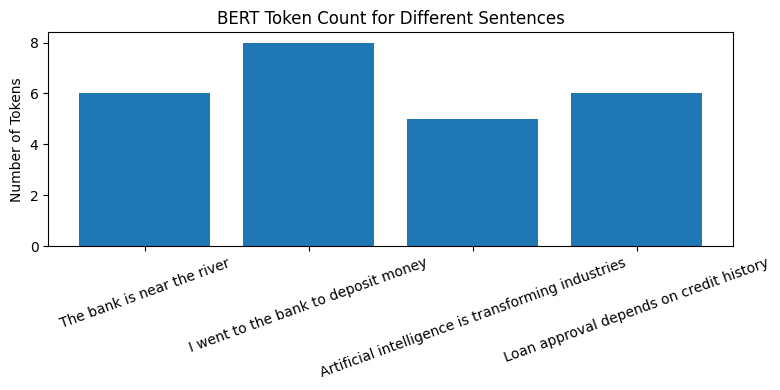

In [10]:
import matplotlib.pyplot as plt

# Sentences to analyze
sentences = [
    "The bank is near the river",
    "I went to the bank to deposit money",
    "Artificial intelligence is transforming industries",
    "Loan approval depends on credit history"
]

# Count tokens for each sentence
token_counts = [len(tokenizer.tokenize(sentence)) for sentence in sentences]

# Plot the results
plt.figure(figsize=(8, 4))
plt.bar(sentences, token_counts)
plt.xticks(rotation=20)
plt.ylabel("Number of Tokens")
plt.title("BERT Token Count for Different Sentences")
plt.tight_layout()
plt.show()


### Visualization Insight

The bar chart illustrates how BERT tokenizes sentences of different lengths.
Longer and more complex sentences result in a higher number of tokens,
which affects the internal representations generated by the model.


## Conclusion and Insights

In this project, we explored the capabilities of the BERT language model
for natural language understanding. Through multiple experiments, we
observed that BERT effectively captures contextual meaning and processes
sentences based on surrounding words rather than isolated terms.

The analysis demonstrated BERT’s strength in understanding ambiguous
words, handling different sentence structures, and generating rich
numerical representations of text. However, the model is limited in
creative text generation and requires fine-tuning for domain-specific
applications.

Overall, this project highlights the importance of transformer-based
language models in modern NLP systems and their practical relevance in
real-world applications such as finance, chatbots, and text analytics.
